In [1]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def scaling_without_crop(a, scaling_factor1, scaling_factor2):
    #a = cv2.imread(path)
    b = np.zeros((int(a.shape[0]*scaling_factor1), int(a.shape[1]*scaling_factor2), a.shape[2]))
    for x in range(a.shape[0]-1):
        for y in range(a.shape[1]-1):
            newx = x*scaling_factor1
            newy = y*scaling_factor2

            if newx<b.shape[0] and newy<b.shape[1]:
                b[round(newx),round(newy),:] = a[x, y,:]
    
    #applying interpolation
    for x in range(b.shape[0]-1):
        for y in range(b.shape[1]-1):
            if b[x,y].any() == 0:
                b[x,y,:] = (b[x+1,y]+b[x-1,y]+b[x,y+1]+b[x,y-1])/4
    
    cv2.imwrite('output_images/im_scaled'+'_'+str(scaling_factor1)+'x'+str(scaling_factor2)+'y'+'.jpg', b)  

    return b          


In [3]:
path = 'animals.png'
im = cv2.imread(path)
s_factor1 = 2
s_factor2 = 1/2
scaled_image = scaling_without_crop(im, s_factor1, s_factor2)

libpng warning: iCCP: known incorrect sRGB profile


In [4]:
#translation without crop
def translation_without_crop(a, tx, ty):
    #a = cv2.imread(path)
    b = np.zeros((int(a.shape[0]+tx), int(a.shape[1]+ty), a.shape[2]))
    for x in range(a.shape[0]-1):
        for y in range(a.shape[1]-1):
            newx = x+tx
            newy = y+ty

            if newx<b.shape[0] and newy<b.shape[1]:
                b[round(newx),round(newy),:] = a[x, y,:]
    
    # #applying interpolation
    # for x in range(b.shape[0]-1):
    #     for y in range(b.shape[1]-1):
    #         if b[x,y].any() == 0:
    #             b[x,y,:] = (b[x+1,y]+b[x-1,y]+b[x,y+1]+b[x,y-1])/4
    
    cv2.imwrite('output_images/im_translated'+'_'+str(tx)+'x'+str(ty)+'y'+'.jpg', b)  

    return b          


In [5]:
path = 'animals.png'
im = cv2.imread(path)
tx = 10
ty = 100

translated_im = translation_without_crop(im, tx, ty)


libpng warning: iCCP: known incorrect sRGB profile


In [6]:
def rotation_without_croping(im, angle):
    #im = cv2.imread(path)

    theta = np.radians(angle)

    X = round(abs(im.shape[0]*np.cos(theta))) +  round(abs(im.shape[1]*np.sin(theta)))
    Y = round(abs(im.shape[1]*np.cos(theta))) +  round(abs(im.shape[0]*np.sin(theta)))

    new_img = (np.zeros((X,Y,im.shape[2])))

    cx = im.shape[1]//2 
    cy = im.shape[0]//2

    new_cx = Y//2
    new_cy = X//2

    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            x= (i-new_cx)*np.cos(theta)+(j-new_cy)*np.sin(theta)
            y= -(i-new_cx)*np.sin(theta)+(j-new_cy)*np.cos(theta)

            x=round(x)+cy
            y=round(y)+cx
            if (x>=0 and y>=0 and x<im.shape[0] and  y<im.shape[1]):

                new_img[i,j,:] = im[x,y,:]

    cv2.imwrite('output_images/im_rotated'+'_'+'angle'+str(angle)+'.jpg', new_img)

    return new_img

In [7]:
path = 'animals.png'
img = cv2.imread(path)
angle = 55

rotated_img = rotation_without_croping(img, angle)

libpng warning: iCCP: known incorrect sRGB profile


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


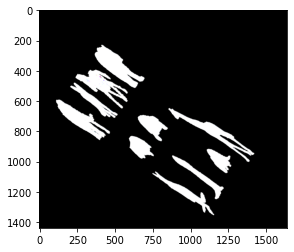

In [8]:
def combined_transformations(img, s_factor1, s_factor2,tx, ty, angle):
    scaled_image = scaling_without_crop(img, s_factor1, s_factor2)
    translated_im = translation_without_crop(scaled_image, tx, ty)
    combined = rotation_without_croping(translated_im, angle)
    plt.imshow(combined)
    cv2.imwrite('output_images/combined_trans.jpg', combined)

im = img
scale_f1 = s_factor1
scale_f2 = s_factor2
trans_x = tx
trans_y = ty
angle = angle
combined_transformations(im, scale_f1, scale_f2, trans_x, trans_y, angle)


In [9]:
#task with croping

In [10]:
def scaling(a, sx, sy):
    #a = cv2.imread(path)
    b = np.zeros((a.shape[0], a.shape[1], a.shape[2]))
    for x in range(a.shape[0]):
        for y in range(a.shape[1]):
            newx = x*sx
            newy = y*sy

            if newx<b.shape[0] and newy<b.shape[1]:
                b[round(newx),round(newy),:] = a[x, y,:]
    
    #applying interpolation
    for x in range(b.shape[0]-1):
        for y in range(b.shape[1]-1):
            if b[x,y].any() == 0:
                b[x,y,:] = (b[x+1,y]+b[x-1,y]+b[x,y+1]+b[x,y-1])/4
    
    cv2.imwrite('output_images/im_scaled'+'_with_crop_'+str(sx)+'x'+str(sy)+'y'+'.jpg', b)  

    return b          


In [11]:
path = 'animals.png'
im = cv2.imread(path)
sx = 1/2
sy = 2
scaled_image = scaling(im, sx, sy)

libpng warning: iCCP: known incorrect sRGB profile


In [12]:
#translation without crop
def translation(a, tx, ty):
    #a = cv2.imread(path)
    b = np.zeros((a.shape[0], a.shape[1], a.shape[2]))
    for x in range(a.shape[0]-1):
        for y in range(a.shape[1]-1):
            newx = x+tx
            newy = y+ty

            if newx<b.shape[0] and newy<b.shape[1]:
                b[round(newx),round(newy),:] = a[x, y,:]
    
    # #applying interpolation
    # for x in range(b.shape[0]-1):
    #     for y in range(b.shape[1]-1):
    #         if b[x,y].any() == 0:
    #             b[x,y,:] = (b[x+1,y]+b[x-1,y]+b[x,y+1]+b[x,y-1])/4
    
    cv2.imwrite('output_images/im_translated'+'_with_crop_'+str(tx)+'x'+str(ty)+'y'+'.jpg', b)  

    return b          


In [13]:
path = 'animals.png'
im = cv2.imread(path)
tx = 100
ty = 1

translated_im = translation(im, tx, ty)


libpng warning: iCCP: known incorrect sRGB profile


In [14]:
def rotation(im, angle):
    #im = cv2.imread(path)

    theta = np.radians(angle)

    

    new_img = (np.zeros((im.shape[0],im.shape[1],im.shape[2])))

    cx = im.shape[1]//2 
    cy = im.shape[0]//2


    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            x= (i)*np.cos(theta)+(j)*np.sin(theta)
            y= -(i)*np.sin(theta)+(j)*np.cos(theta)

            x=round(x)#+cy
            y=round(y)#+cx
            if (x>=0 and y>=0 and x<im.shape[0] and  y<im.shape[1]):

                new_img[i,j,:] = im[x,y,:]

    cv2.imwrite('output_images/im_rotatedwith_crop'+'_'+'angle'+str(angle)+'.jpg', new_img)

    return new_img

In [15]:
path = 'animals.png'
img = cv2.imread(path)
angle = 10

rotated_img = rotation(img, angle)

libpng warning: iCCP: known incorrect sRGB profile


In [16]:
def combined_transformations(img, sx, sy, tx, ty, angle):
    img = rotation(img, angle)
    scaled_image = scaling(img, sx, sy)
    translated_im = translation(scaled_image, tx, ty)
    #combined = rotation(translated_im, angle)
#    plt.imshow(combined)
    cv2.imwrite('output_images/combined_trans.jpg', translated_im)

im = img
scale_fx = sx
scale_fy = sy
trans_x = tx
trans_y = ty
angle = angle
combined_transformations(im, scale_fx, scale_fx, trans_x, trans_y, angle)
